## Assignment Jupyter Notebook

## Text Mining and Language Analytics

## Fergus J. P. Walsh

### Part 1

### Loading and preparing data.

The two .csv files are read and converted to Pandas data frame objects. 
Exploratory data analysis (Table 1).

In [1]:
import pandas as pd
dataset_train1 = pd.read_csv("tweets_training.csv")
dataset_test1 = pd.read_csv("tweets_test.csv")

labels_train1 = dataset_train1["sentiment"].tolist()
text_train1 = dataset_train1["text"].tolist()
print("Training set size:", len(text_train1))

labels_test1 = dataset_test1["sentiment"].tolist()
text_test1 = dataset_test1["text"].tolist()
print("Test set size:", len(text_test1))

print("Positive training tweets:", labels_train1.count("positive"))
print("Neutral training tweets:",labels_train1.count("neutral"))
print("Negative training tweets:",labels_train1.count("negative"))
print("Positive test tweets:", labels_test1.count("positive"))
print("Neutral test tweets:",labels_test1.count("neutral"))
print("Negative test tweets:",labels_test1.count("negative"))

Training set size: 10248
Test set size: 2196
Positive training tweets: 1630
Neutral training tweets: 2184
Negative training tweets: 6434
Positive test tweets: 361
Neutral test tweets: 455
Negative test tweets: 1380


The text is tokenised for use in the Naïve Bayes classifier. Any single token texts are removed.

In [2]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer(preserve_case = False, strip_handles=True)

token_train = []
labels_train = []
token_test = []
labels_test = []

for i in range(len(text_train1)):
    try:
        tokens = tt.tokenize(text_train1[i].lower())
        if(len(tokens)>1):
            token_train.append(tokens)
            labels_train.append(labels_train1[i])
        else:
            print("Text no.", i, "in the training set contained only one token and was removed.")
    except:
        pass
print("Total no. training tweets:", len(token_train))
print("Total no. training labels:", len(labels_train))
print("Training tweet 1:", token_train[0])

for j in range(len(text_test1)):
    try:
        tokens = tt.tokenize(text_test1[j].lower())
        if(len(tokens)>1):
            token_test.append(tokens)
            labels_test.append(labels_test1[j])
        else:
            print("Text no.", j, "in the test set contained only one token and was removed.")
    except:
        pass
print("Total no. test tweets:", len(token_test))
print("Total no. test labels:", len(labels_test))
print("Test tweet 1:", token_test[0])

Text no. 329 in the training set contained only one token and was removed.
Text no. 376 in the training set contained only one token and was removed.
Text no. 535 in the training set contained only one token and was removed.
Text no. 601 in the training set contained only one token and was removed.
Text no. 670 in the training set contained only one token and was removed.
Text no. 691 in the training set contained only one token and was removed.
Text no. 739 in the training set contained only one token and was removed.
Text no. 995 in the training set contained only one token and was removed.
Text no. 1036 in the training set contained only one token and was removed.
Text no. 1456 in the training set contained only one token and was removed.
Text no. 1596 in the training set contained only one token and was removed.
Text no. 1995 in the training set contained only one token and was removed.
Text no. 2386 in the training set contained only one token and was removed.
Text no. 2494 in the

The training data set is prepared to be used by the neural networks. The labels are one-hot encoded. The data set is saved as a .csv.

In [3]:
import pandas as pd
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labels_train2 = dataset_train1["sentiment"]
text_train2 = dataset_train1["text"]
labels_train2 = array(labels_train2)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_train2)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels_train2 = onehot_encoder.fit_transform(integer_encoded)

dataset_train2 = pd.DataFrame(columns=["sentiment","text"])
dataset_train2["sentiment"] = dataset_train2["sentiment"].astype(object)
for i in range(len(labels_train2)):
    dataset_train2.loc[i, "sentiment"] = labels_train2[i]
    dataset_train2.loc[i, "text"] = text_train2[i]

print(dataset_train2.head())
dataset_train2.to_csv("dataset_train2.csv", index = False)

         sentiment                                               text
0  [1.0, 0.0, 0.0]  @united + besides, no small degree of self-int...
1  [1.0, 0.0, 0.0]  @USAirways had mom sit for 3 hours waiting for...
2  [1.0, 0.0, 0.0]  @SouthwestAir you could be a little more accom...
3  [1.0, 0.0, 0.0]  @united WORST SERVICE EVER. Denied access to o...
4  [1.0, 0.0, 0.0]  @USAirways I've been on a music hold for over ...


### Part 2

### Data transformation and preprocessing

The data sets are preprocessed for use by the Naïve Bayes classifiers. Punctuation is removed and each text is reformatted as a bag of words.

In [13]:
import re
pp_train = token_train
pp_test = token_test

for i in range(len(pp_train)):
    new_tokens = []
    for word in pp_train[i]:
        word = word.replace("-", "")
        word = word.replace(".", "")
        word = word.replace("amp", "")
        regex_check = re.match("[a-z@#]+", word)
        if(regex_check!=None):
            if(regex_check.group()==word):
                new_tokens.append(word)
    pp_train[i] = new_tokens

for i in range(len(pp_train)):
    if(len(pp_train[i])==0):
        print("Text no.", i, "in the training set is empty and was removed.")
        pp_train.pop(i)
        labels_train.pop(i)

for j in range(len(pp_test)):
    new_tokens = []
    for word in pp_test[j]:
        word = word.replace("-", "")
        word = word.replace(".", "")
        word = word.replace("amp", "")
        regex_check = re.match("[a-z@#]+", word)
        if(regex_check!=None):
            if(regex_check.group()==word):
                new_tokens.append(word)
    pp_test[j] = new_tokens

for j in range(len(pp_test)):
    if(len(pp_test[j])==0):
        print("Text no.", j, "in the test set is empty and was removed.")
        pp_test.pop(j)
        labels_test.pop(j)

bagofwords_train = []
bagofwords_test = []

for k in range(len(pp_train)):
    text = " ".join(pp_train[k])
    bagofwords_train.append(text)

for l in range(len(pp_test)):
    text = " ".join(pp_test[l])
    bagofwords_test.append(text)

print("First 5 texts in training set as bags of words:\n", bagofwords_train[0:5])
print("First 5 texts in test set as bags of words:\n", bagofwords_test[0:5])

First 5 texts in training set as bags of words:
 ['besides no small degree of selfinterest we take that route several times a year would hate to be in that situation', 'had mom sit for hours waiting for a flight they ultimately cancelled flighted to give her a tuesday morning flight no compensation ugh', 'you could be a little more accommodating with extending my flight creditwhats extra days #notahappytraveler', 'worst service ever denied access to our flight and then moved flight times how hard is it to schedule a gate next time', 'been on a music hold for over a hour trying to get my aadvantage membership merged can someone please call me asap']
First 5 texts in test set as bags of words:
 ['i submitted a complaint via that link in dec followed up in jan never heard back #badcustomerservice', 'could you check if there is swu typo in last post space on mxpjfk feb thanks', 'i always tell everyone to fly southwest congratulations', 'please help regarding pnr why am i now waitlisted for

The training data set is prepared to train the neural networks. Texts are tokenised. Training data set split into a training and validation folds. Vocabulary built for training and validation folds.

In [14]:
import torch
from torchtext.legacy import data
from nltk.tokenize import TweetTokenizer
import random

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)

TEXT = data.Field(tokenize=tokenizer.tokenize,batch_first=True,include_lengths=True)
LABEL = data.LabelField(batch_first=True, dtype = torch.float)
fields = [("label",LABEL),("text",TEXT)]
dataset_train3 = data.TabularDataset(path = "dataset_train2.csv", format = "csv", fields = fields, skip_header = True)

print("First text in training set:", vars(dataset_train3.examples[0]))
print("Second text in training set:", vars(dataset_train3.examples[1]))

nn_train1, nn_val1 = dataset_train3.split(split_ratio=0.7)

print("Size of training fold:",len(nn_train1))
print("Size of validation fold:",len(nn_val1))

TEXT.build_vocab(nn_train1, min_freq = 1)
LABEL.build_vocab(nn_train1)

print("Size of TEXT vocab.:", len(TEXT.vocab))
print("Size of LABEL vocab.:", len(LABEL.vocab))
print("Most common tokens in training set:",TEXT.vocab.freqs.most_common(10))
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])
print("Label keys:", LABEL.vocab.stoi)

First text in training set: {'label': '[1. 0. 0.]', 'text': ['+', 'besides', ',', 'no', 'small', 'degree', 'of', 'self-interest', '.', 'we', 'take', 'that', 'route', 'several', 'times', 'a', 'year', '&', 'would', 'hate', 'to', 'be', 'in', 'that', 'situation', '.']}
Second text in training set: {'label': '[1. 0. 0.]', 'text': ['had', 'mom', 'sit', 'for', '3', 'hours', 'waiting', 'for', 'a', 'flight', 'they', 'ultimately', 'cancelled', 'flighted', 'to', 'give', 'her', 'a', 'tuesday', 'morning', 'flight', '...', 'no', 'compensation', '.', 'ugh']}
Size of training fold: 7174
Size of validation fold: 3074
Size of TEXT vocab.: 10618
Size of LABEL vocab.: 3
Most common tokens in training set: [('.', 6760), ('to', 4241), ('the', 2906), ('i', 2709), ('!', 2447), ('?', 2282), ('a', 2258), (',', 2067), ('you', 1963), ('for', 1954)]
Index of unknown word <unk>: 0
Index of padding word <pad>: 1
Label keys: defaultdict(None, {'[1. 0. 0.]': 0, '[0. 1. 0.]': 1, '[0. 0. 1.]': 2})


### Part 3

### Naïve Bayes Classifier

Model 1: Multinominal Naïve Bayes

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)

model1 = make_pipeline(TfidfVectorizer(tokenizer = tokenizer.tokenize), MultinomialNB())
model1.fit(bagofwords_train, labels_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000002729D6EE940>>)),
                ('multinomialnb', MultinomialNB())])

Model 2: Binary, or Bernoulli Naïve Bayes

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)

model2 = make_pipeline(TfidfVectorizer(tokenizer = tokenizer.tokenize), BernoulliNB())
model2.fit(bagofwords_train, labels_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000002729D6EE8B0>>)),
                ('bernoullinb', BernoulliNB())])

### Part 4

### Recurrent Neural Network Classifier (Model 3)

Defining model architecture

In [25]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:",device)
BATCH_SIZE = 32
training_iterator, test_iterator = data.BucketIterator.splits(
    (nn_train1, nn_val1),
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

class RNN_Model3(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
        bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim, 
                            num_layers=n_layers, 
                            bidirectional=bidirectional, 
                            dropout=dropout, 
                            batch_first=True)
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim)
    
    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
        dense_outputs=self.fc1(hidden)
        return dense_outputs

vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 10
LSTM_no_of_hidden_nodes = 64
LSTM_no_of_recurrent_layers = 1
LSTM_bidirection = True
LSTM_dropout = 0
output_size = len(LABEL.vocab)

model3 = RNN_Model3(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes,
    output_size, LSTM_no_of_recurrent_layers,
    bidirectional = LSTM_bidirection,dropout = LSTM_dropout)

print("RNN (Model 3) architecture:\n",model3)

def count_parameters(model3):
    return sum(p.numel() for p in model3.parameters() if p.requires_grad)
print("\nModel 3 trainable parameters:",count_parameters(model3))

import torch.optim as optim
optimizer = optim.Adam(model3.parameters())
criterion = nn.CrossEntropyLoss()

def categorical_accuracy(preds, y):
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

model3 = model3.to(device)
criterion = criterion.to(device)

def train(model3, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model3.train()
    for batch in iterator:
        optimizer.zero_grad()
        text, text_lengths = batch.text
        predictions = model3(text, text_lengths)
        loss = criterion(predictions, batch.label.type(torch.LongTensor))
        acc = categorical_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model3, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model3.eval()
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model3(text, text_lengths)
            loss = criterion(predictions, batch.label.type(torch.LongTensor))
            acc = categorical_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Device: cpu
RNN (Model 3) architecture:
 RNN_Model3(
  (embedding): Embedding(10618, 10)
  (lstm): LSTM(10, 64, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=3, bias=True)
)

Model 3 trainable parameters: 145479


Training the model over 25 epochs

In [26]:
import time

N_EPOCHS = 25
best_valid_loss1 = float('inf')
best_valid_acc1 = float('inf')
best_epoch1 = 0

epoch_loss_train1 = []
epoch_loss_valid1 = []
epoch_accuracy_train1 = []
epoch_accuracy_valid1 = []

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='')
    start = time.time()
    train_loss, train_acc = train(model3, training_iterator, optimizer, criterion)
    epoch_loss_train1.append(train_loss)
    epoch_accuracy_train1.append(train_acc)
    
    valid_loss, valid_acc = evaluate(model3, test_iterator, criterion)
    epoch_loss_valid1.append(valid_loss)
    epoch_accuracy_valid1.append(valid_acc)
    
    if valid_loss < best_valid_loss1:
        best_valid_loss1 = valid_loss
        best_valid_acc1 = valid_acc
        best_epoch1 = epoch
        torch.save(model3.state_dict(), 'saved_weights.pt')
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='')
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='')
    print(" - %3.2f s" % (time.time()-start))
print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" % (best_epoch1,best_valid_loss1,best_valid_acc1))

Epoch   0: Train loss: 0.861 | Train acuracy: 0.6398 | Validation loss: 0.797 | Validation acuracy: 0.6643 - 6.09 s
Epoch   1: Train loss: 0.759 | Train acuracy: 0.6843 | Validation loss: 0.750 | Validation acuracy: 0.6830 - 6.25 s
Epoch   2: Train loss: 0.701 | Train acuracy: 0.7120 | Validation loss: 0.731 | Validation acuracy: 0.6927 - 5.97 s
Epoch   3: Train loss: 0.642 | Train acuracy: 0.7406 | Validation loss: 0.702 | Validation acuracy: 0.7117 - 6.11 s
Epoch   4: Train loss: 0.596 | Train acuracy: 0.7613 | Validation loss: 0.687 | Validation acuracy: 0.7146 - 6.00 s
Epoch   5: Train loss: 0.543 | Train acuracy: 0.7847 | Validation loss: 0.706 | Validation acuracy: 0.7255 - 7.50 s
Epoch   6: Train loss: 0.498 | Train acuracy: 0.8038 | Validation loss: 0.699 | Validation acuracy: 0.7345 - 5.75 s
Epoch   7: Train loss: 0.458 | Train acuracy: 0.8246 | Validation loss: 0.745 | Validation acuracy: 0.7403 - 5.78 s
Epoch   8: Train loss: 0.421 | Train acuracy: 0.8391 | Validation loss: 

Plotting change in loss and accuracy during training process. Figure 2 a

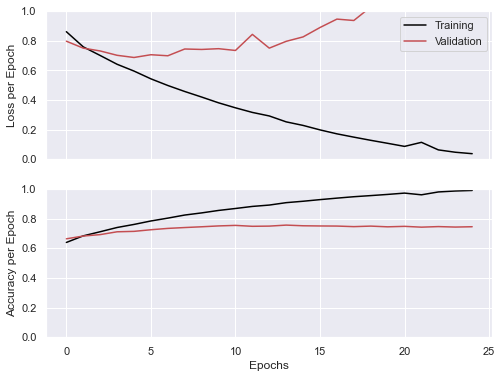

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams["font.family"] = "Arial"

eps = np.arange(N_EPOCHS)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6), sharex=True)

ax1.set_ylim([0, 1])
ax1.plot(epoch_loss_train1,'black')
ax1.plot(epoch_loss_valid1,'r')
ax1.set_ylabel("Loss per Epoch")
ax1.legend(["Training","Validation"])

ax2.set_ylim([0, 1])
ax2.plot(epoch_accuracy_train1,'black')
ax2.plot(epoch_accuracy_valid1,'r')
ax2.set_ylabel("Accuracy per Epoch")
ax2.set_xlabel("Epochs");

# plt.savefig("TMLA02.pdf")
plt.show()

### Model 4

The training data is re-folded into a training and validation fold for the second neural network and the TEXT and LABEL variables are redefined

In [20]:
import torch
from torchtext.legacy import data
from nltk.tokenize import TweetTokenizer
import random

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)

TEXT = data.Field(tokenize=tokenizer.tokenize,batch_first=True,include_lengths=True)
LABEL = data.LabelField(batch_first=True, dtype = torch.float)
fields = [("label",LABEL),("text",TEXT)]
dataset_train3 = data.TabularDataset(path = "dataset_train2.csv", format = "csv", fields = fields, skip_header = True)

print("First text in training set:", vars(dataset_train3.examples[0]))
print("Second text in training set:", vars(dataset_train3.examples[1]))

nn_train2, nn_val2 = dataset_train3.split(split_ratio=0.7)

print("Size of training fold:",len(nn_train2))
print("Size of validation fold:",len(nn_val2))

TEXT.build_vocab(nn_train2, min_freq = 1)
LABEL.build_vocab(nn_train2)

print("Size of TEXT vocab.:", len(TEXT.vocab))
print("Size of LABEL vocab.:", len(LABEL.vocab))
print("Most common tokens in training set:",TEXT.vocab.freqs.most_common(10))
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])
print("Label keys:", LABEL.vocab.stoi)

First text in training set: {'label': '[1. 0. 0.]', 'text': ['+', 'besides', ',', 'no', 'small', 'degree', 'of', 'self-interest', '.', 'we', 'take', 'that', 'route', 'several', 'times', 'a', 'year', '&', 'would', 'hate', 'to', 'be', 'in', 'that', 'situation', '.']}
Second text in training set: {'label': '[1. 0. 0.]', 'text': ['had', 'mom', 'sit', 'for', '3', 'hours', 'waiting', 'for', 'a', 'flight', 'they', 'ultimately', 'cancelled', 'flighted', 'to', 'give', 'her', 'a', 'tuesday', 'morning', 'flight', '...', 'no', 'compensation', '.', 'ugh']}
Size of training fold: 7174
Size of validation fold: 3074
Size of TEXT vocab.: 10618
Size of LABEL vocab.: 3
Most common tokens in training set: [('.', 6760), ('to', 4241), ('the', 2906), ('i', 2709), ('!', 2447), ('?', 2282), ('a', 2258), (',', 2067), ('you', 1963), ('for', 1954)]
Index of unknown word <unk>: 0
Index of padding word <pad>: 1
Label keys: defaultdict(None, {'[1. 0. 0.]': 0, '[0. 1. 0.]': 1, '[0. 0. 1.]': 2})


Defining model architecture

In [21]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:",device)
BATCH_SIZE = 16
training_iterator, test_iterator = data.BucketIterator.splits(
    (nn_train2, nn_val2),
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

class RNN_Model4(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
        bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim, 
                            num_layers=n_layers, 
                            bidirectional=bidirectional, 
                            dropout=dropout, 
                            batch_first=True)
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim)
    
    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
        dense_outputs=self.fc1(hidden)
        return dense_outputs

vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 10
LSTM_no_of_hidden_nodes = 8
LSTM_no_of_recurrent_layers = 2
LSTM_bidirection = True
LSTM_dropout = 0.5
output_size = len(LABEL.vocab)

model4 = RNN_Model4(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes,
    output_size, LSTM_no_of_recurrent_layers,
    bidirectional = LSTM_bidirection,dropout = LSTM_dropout)

print("RNN (Model 4) architecture:\n",model4)

def count_parameters(model4):
    return sum(p.numel() for p in model4.parameters() if p.requires_grad)
print("\nModel 4 trainable parameters:",count_parameters(model4))

import torch.optim as optim
optimizer = optim.Adam(model4.parameters())
criterion = nn.CrossEntropyLoss()

def categorical_accuracy(preds, y):
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

model4 = model4.to(device)
criterion = criterion.to(device)

def train(model4, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model4.train()
    for batch in iterator:
        optimizer.zero_grad()
        text, text_lengths = batch.text
        predictions = model4(text, text_lengths)
        loss = criterion(predictions, batch.label.type(torch.LongTensor))
        acc = categorical_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model4, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model4.eval()
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model4(text, text_lengths)
            loss = criterion(predictions, batch.label.type(torch.LongTensor))
            acc = categorical_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Device: cpu
RNN (Model 4) architecture:
 RNN_Model4(
  (embedding): Embedding(10618, 10)
  (lstm): LSTM(10, 8, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc1): Linear(in_features=16, out_features=3, bias=True)
)

Model 4 trainable parameters: 109175


Training the model over 25 epochs

In [22]:
import time

N_EPOCHS = 25
best_valid_loss2 = float('inf')
best_valid_acc2 = float('inf')
best_epoch2 = 0

epoch_loss_train2 = []
epoch_loss_valid2 = []
epoch_accuracy_train2 = []
epoch_accuracy_valid2 = []

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='')
    start = time.time()
    train_loss, train_acc = train(model4, training_iterator, optimizer, criterion)
    epoch_loss_train2.append(train_loss)
    epoch_accuracy_train2.append(train_acc)
    
    valid_loss, valid_acc = evaluate(model4, test_iterator, criterion)
    epoch_loss_valid2.append(valid_loss)
    epoch_accuracy_valid2.append(valid_acc)
    
    if valid_loss < best_valid_loss2:
        best_valid_loss2 = valid_loss
        best_valid_acc2 = valid_acc
        best_epoch2 = epoch
        torch.save(model4.state_dict(), 'saved_weights.pt')
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='')
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='')
    print(" - %3.2f s" % (time.time()-start))
print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" % (best_epoch2,best_valid_loss2,best_valid_acc2))

Epoch   0: Train loss: 0.880 | Train acuracy: 0.6308 | Validation loss: 0.811 | Validation acuracy: 0.6509 - 10.57 s
Epoch   1: Train loss: 0.770 | Train acuracy: 0.6730 | Validation loss: 0.746 | Validation acuracy: 0.6823 - 10.34 s
Epoch   2: Train loss: 0.692 | Train acuracy: 0.7078 | Validation loss: 0.704 | Validation acuracy: 0.6969 - 10.30 s
Epoch   3: Train loss: 0.627 | Train acuracy: 0.7384 | Validation loss: 0.694 | Validation acuracy: 0.7102 - 10.33 s
Epoch   4: Train loss: 0.579 | Train acuracy: 0.7633 | Validation loss: 0.659 | Validation acuracy: 0.7202 - 10.28 s
Epoch   5: Train loss: 0.534 | Train acuracy: 0.7833 | Validation loss: 0.648 | Validation acuracy: 0.7309 - 10.38 s
Epoch   6: Train loss: 0.494 | Train acuracy: 0.8020 | Validation loss: 0.650 | Validation acuracy: 0.7345 - 10.33 s
Epoch   7: Train loss: 0.460 | Train acuracy: 0.8217 | Validation loss: 0.656 | Validation acuracy: 0.7481 - 10.26 s
Epoch   8: Train loss: 0.429 | Train acuracy: 0.8362 | Validatio

Plotting change in loss and accuracy during training process. Figure 2 b

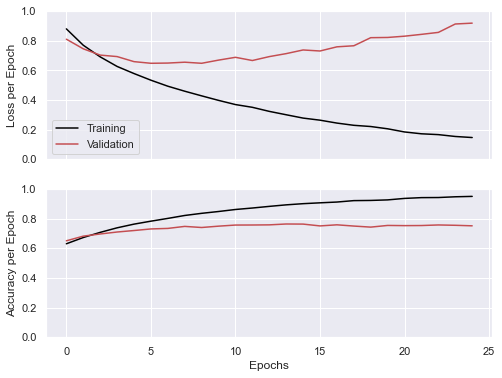

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams["font.family"] = "Arial"

eps = np.arange(N_EPOCHS)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6), sharex=True)

ax1.set_ylim([0, 1])
ax1.plot(epoch_loss_train2,'black')
ax1.plot(epoch_loss_valid2,'r')
ax1.set_ylabel("Loss per Epoch")
ax1.legend(["Training","Validation"])

ax2.set_ylim([0, 1])
ax2.plot(epoch_accuracy_train2,'black')
ax2.plot(epoch_accuracy_valid2,'r')
ax2.set_ylabel("Accuracy per Epoch")
ax2.set_xlabel("Epochs");

# plt.savefig("TMLA03.pdf")
plt.show()

### Part 5

### Testing against the test data set

### Confusion matricies and performance statistics

Model 1: Multinominal Naïve Bayes. Figure 4

Accuracy:	0.676578
F1-score:	0.419289
Precision:	0.791994
Recall:		0.420731

Classification performance:
              precision    recall  f1-score   support

    negative       0.67      1.00      0.80      1378
     neutral       0.84      0.12      0.21       450
    positive       0.87      0.15      0.25       358

    accuracy                           0.68      2186
   macro avg       0.79      0.42      0.42      2186
weighted avg       0.74      0.68      0.59      2186



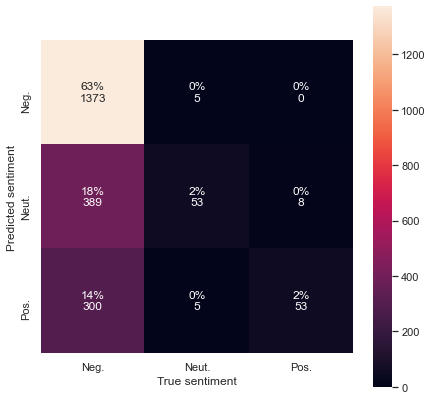

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = [7, 7]

prediction1 = model1.predict(bagofwords_test)
mat1 = confusion_matrix(labels_test, prediction1)
mat1_perc = ["{0:.0%}".format(value) for value in mat1.flatten()/np.sum(mat1)]
mat1_count = ["{0:0.0f}".format(value) for value in mat1.flatten()]
mat1_labels = [f"{v1}\n{v2}" for v1, v2 in zip(mat1_perc,mat1_count)]
mat1_labels = np.asarray(mat1_labels).reshape(3,3)

sns.heatmap(mat1, square = True, xticklabels = ["Neg.", "Neut.", "Pos."], yticklabels = ["Neg.", "Neut.", "Pos."], annot=mat1_labels, fmt = "")
plt.xlabel("True sentiment")
plt.ylabel("Predicted sentiment")
# plt.savefig("TMLA04.pdf")
plt.show()

print("Accuracy:\t%f" % accuracy_score(labels_test, prediction1))
print("F1-score:\t%f" % f1_score(labels_test, prediction1, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, prediction1, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, prediction1, average='macro'))
print("\nClassification performance:\n%s" % classification_report(labels_test, prediction1))

Model 2: Binary, or Bernoulli Naïve Bayes. Figure 5

Accuracy:	0.775846
F1-score:	0.677510
Precision:	0.762895
Recall:		0.638591

Classification performance:
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1378
     neutral       0.66      0.50      0.57       450
    positive       0.84      0.47      0.60       358

    accuracy                           0.78      2186
   macro avg       0.76      0.64      0.68      2186
weighted avg       0.77      0.78      0.76      2186



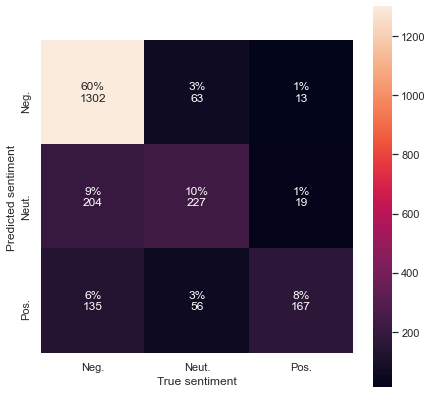

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = [7, 7]

prediction2 = model2.predict(bagofwords_test)
mat2 = confusion_matrix(labels_test, prediction2)
mat2_perc = ["{0:.0%}".format(value) for value in mat2.flatten()/np.sum(mat2)]
mat2_count = ["{0:0.0f}".format(value) for value in mat2.flatten()]
mat2_labels = [f"{v1}\n{v2}" for v1, v2 in zip(mat2_perc,mat2_count)]
mat2_labels = np.asarray(mat2_labels).reshape(3,3)
sns.heatmap(mat2, square = True, xticklabels = ["Neg.", "Neut.", "Pos."], yticklabels = ["Neg.", "Neut.", "Pos."], annot=mat2_labels, fmt = "")

plt.xlabel("True sentiment")
plt.ylabel("Predicted sentiment")
# plt.savefig("TMLA05.pdf")
plt.show()

print("Accuracy:\t%f" % accuracy_score(labels_test, prediction2))
print("F1-score:\t%f" % f1_score(labels_test, prediction2, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, prediction2, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, prediction2, average='macro'))
print("\nClassification performance:\n%s" % classification_report(labels_test, prediction2))

Model 3: Recurrent Neural Network. Figure 6

Accuracy:	0.731330
F1-score:	0.627452
Precision:	0.682051
Recall:		0.599230

Classification performance:
              precision    recall  f1-score   support

    negative       0.77      0.90      0.83      1380
     neutral       0.56      0.39      0.46       455
    positive       0.72      0.50      0.59       361

    accuracy                           0.73      2196
   macro avg       0.68      0.60      0.63      2196
weighted avg       0.72      0.73      0.71      2196



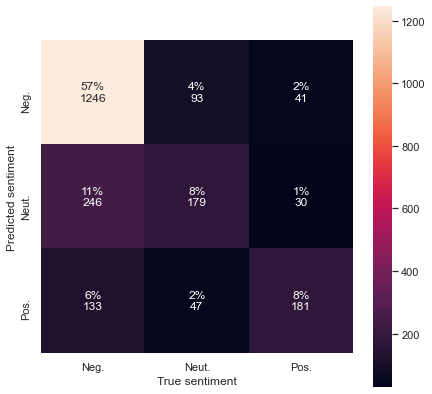

In [38]:
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)
sns.set()
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = [7, 7]

def model3_predict(model3, sentence):
    tokenised = [token for token in tokenizer.tokenize(sentence)]
    indexed = [TEXT.vocab.stoi[token] for token in tokenised]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1).T
    length_tensor = torch.DoubleTensor(length)
    prediction = model3(tensor, length_tensor)
    prediction = prediction.argmax(dim = 1)
    return prediction.item()
label_names = {0:"negative", 1:"neutral", 2:"positive"}

prediction3 = []
for i in text_test1:
    predict_label = label_names[model3_predict(model3, i)]
    prediction3.append(predict_label)

mat3 = confusion_matrix(labels_test1, prediction3)
mat3_perc = ["{0:.0%}".format(value) for value in mat3.flatten()/np.sum(mat3)]
mat3_count = ["{0:0.0f}".format(value) for value in mat3.flatten()]
mat3_labels = [f"{v1}\n{v2}" for v1, v2 in zip(mat3_perc,mat3_count)]
mat3_labels = np.asarray(mat3_labels).reshape(3,3)
sns.heatmap(mat3, square = True, xticklabels = ["Neg.", "Neut.", "Pos."], yticklabels = ["Neg.", "Neut.", "Pos."], annot=mat3_labels, fmt = "")
plt.xlabel("True sentiment")
plt.ylabel("Predicted sentiment")
# plt.savefig("TMLA06.pdf")
plt.show()

print("Accuracy:\t%f" % accuracy_score(labels_test1, prediction3))
print("F1-score:\t%f" % f1_score(labels_test1, prediction3, average='macro'))
print("Precision:\t%f" % precision_score(labels_test1, prediction3, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test1, prediction3, average='macro'))
print("\nClassification performance:\n%s" % classification_report(labels_test1, prediction3))

Model 4. Figure 7

Accuracy:	0.758197
F1-score:	0.684386
Precision:	0.710423
Recall:		0.670030

Classification performance:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1380
     neutral       0.53      0.58      0.55       455
    positive       0.77      0.56      0.65       361

    accuracy                           0.76      2196
   macro avg       0.71      0.67      0.68      2196
weighted avg       0.76      0.76      0.76      2196



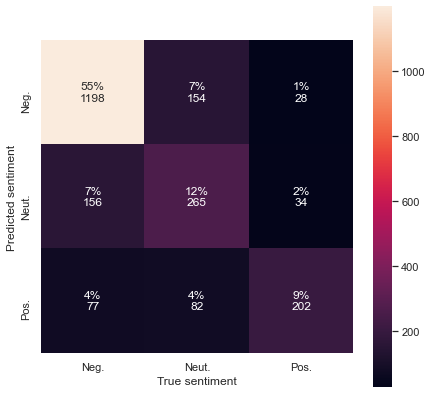

In [39]:
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)
sns.set()
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = [7, 7]

def model4_predict(model4, sentence):
    tokenised = [token for token in tokenizer.tokenize(sentence)]
    indexed = [TEXT.vocab.stoi[token] for token in tokenised]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1).T
    length_tensor = torch.DoubleTensor(length)
    prediction = model4(tensor, length_tensor)
    prediction = prediction.argmax(dim = 1)
    return prediction.item()
label_names = {0:"negative", 1:"neutral", 2:"positive"}

prediction4 = []
for i in text_test1:
    predict_label = label_names[model4_predict(model4, i)]
    prediction4.append(predict_label)

mat4 = confusion_matrix(labels_test1, prediction4)
mat4_perc = ["{0:.0%}".format(value) for value in mat4.flatten()/np.sum(mat4)]
mat4_count = ["{0:0.0f}".format(value) for value in mat4.flatten()]
mat4_labels = [f"{v1}\n{v2}" for v1, v2 in zip(mat4_perc,mat4_count)]
mat4_labels = np.asarray(mat4_labels).reshape(3,3)
sns.heatmap(mat4, square = True, xticklabels = ["Neg.", "Neut.", "Pos."], yticklabels = ["Neg.", "Neut.", "Pos."], annot=mat4_labels, fmt = "")
plt.xlabel("True sentiment")
plt.ylabel("Predicted sentiment")
# plt.savefig("TMLA07.pdf")
plt.show()

print("Accuracy:\t%f" % accuracy_score(labels_test1, prediction4))
print("F1-score:\t%f" % f1_score(labels_test1, prediction4, average='macro'))
print("Precision:\t%f" % precision_score(labels_test1, prediction4, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test1, prediction4, average='macro'))
print("\nClassification performance:\n%s" % classification_report(labels_test1, prediction4))

### Part 6

### Saving the trained neural networks and a function for new tweets

Saving with pickle

In [2]:
import pickle
pkl_filename1 = "FJPW_Model3.pkl"
pkl_filename2 = "FJPW_Model4.pkl"
with open(pkl_filename1, "wb") as file:
    pickle.dump(model3, file)
with open(pkl_filename2, "wb") as file:
    pickle.dump(model4, file)

NameError: name 'model3' is not defined

Loading the networks and classifying new tweets

In [1]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True)
def tweet_predict(pickle_model, sentence):
    tokenised = [token for token in tokenizer.tokenize(sentence)]
    indexed = [TEXT.vocab.stoi[token] for token in tokenised]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1).T
    length_tensor = torch.DoubleTensor(length)
    prediction = pickle_model(tensor, length_tensor)
    prediction = prediction.argmax(dim = 1)
    return prediction.item()
label_names = {0:"negative", 1:"neutral", 2:"positive"}

pickle_model = input("Please enter filename of classifier to be used (FJPW_Model3.pkl or FJPW_Model4.pkl): ")

import pickle
with open(fr"{pickle_model}", "rb") as file:
    pickle_model = pickle.load(file)

new_tweet = input("Please enter the tweet to be classified here: ")
print("This tweet has been classified as", label_names[tweet_predict(pickle_model, new_tweet)])

Please enter filename of classifier to be used (FJPW_Model3.pkl or FJPW_Model4.pkl): FJPW_Model3.pkl


AttributeError: Can't get attribute 'RNN_Model3' on <module '__main__'>